In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [2]:
df_feature_vector = pd.read_parquet('data/feature_vector.parquet')

df_label = pd.read_parquet('data/label_v1.parquet')
df_label_short = df_label[['id', 'calc_label_score']]


In [3]:
feature_cols = [
    'p_tag',
    'img_tag',
    'b_tag',
    'li_tag',
    'header_img',
    'text_len',
    'span_tag',
    'a_tag',
    'u_tag',
    'costsRating',
    'executionTimeRating',
    'isPrepairationNeeded',

    'total_words',

    'nomen_quote',
    'adjektive_quote',
    'numerisch_quote',
    'satzzeichen_quote',
    'konjunktion_quote',

    'count_question_mark',

    'Haik',
    'Kreatives',
    'Wölflinge',
    'Pfadfinder',
    'Rover'
]

df = pd.merge(df_label_short, df_feature_vector, left_on=['id'], right_on= ['event_id'], how = 'left')

In [4]:
X = df.loc[:, feature_cols]

In [5]:
y = df.calc_label_score

In [6]:
#### Fit regression model
clf = DecisionTreeRegressor(max_depth=4)
clf.fit(X, y)

DecisionTreeRegressor(max_depth=4)

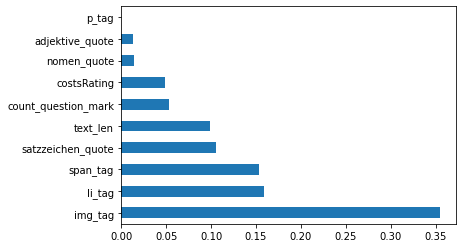

In [7]:
importances = clf.feature_importances_
f_import = list(zip(importances, feature_cols))

(pd.Series(clf.feature_importances_, index=X.columns)
   .nlargest(10)
   .plot(kind='barh'))        # some method chaining, because it's sexy!

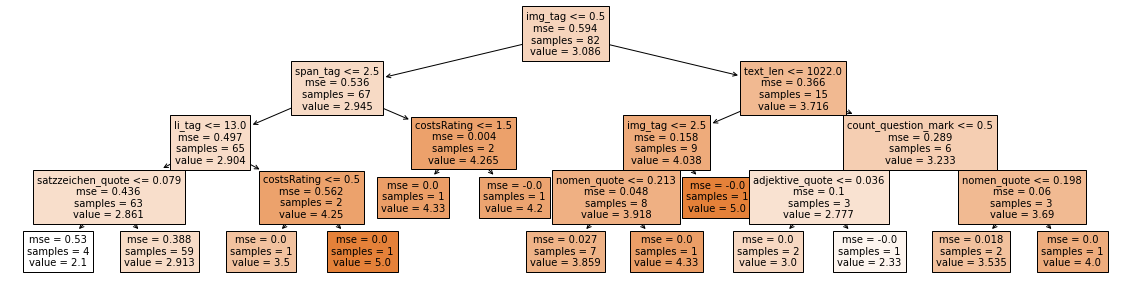

In [8]:
# plot tree
plt.figure(figsize=(20, 5))  # set plot size (denoted in inches)
tree.plot_tree(clf,
               fontsize=10,
               feature_names = feature_cols,
               filled = True);

plt.show()

In [9]:
X_test = df_feature_vector.loc[:, feature_cols]

y_predict = clf.predict(X_test)

In [10]:
df_1 = pd.DataFrame(data=X_test)
df_2 = pd.DataFrame(data=y_predict)

In [11]:
df_score_v1_temp = pd.concat([df_feature_vector, df_2], axis=1)
df_score_v1 = pd.merge(df_score_v1_temp, df_label_short, left_on=['id'], right_on= ['id'], how = 'left')

df_score_v1 = df_score_v1.sort_values(by=0, ascending=False)
df_score_v1 = df_score_v1.rename(columns={0: "inspi_score"})


df_score_v1

,id,title,description,costsRating,executionTimeRating,isPrepairationNeeded,imageLink,created_at,createdBy,p_tag,img_tag,b_tag,li_tag,span_tag,a_tag,u_tag,header_img,text,count_question_mark,title_len,text_len,html_len,species_pos,total_words,total_nomen,total_adjektive,total_numerisch,total_satzzeichen,total_konjunktion,nomen_quote,adjektive_quote,numerisch_quote,satzzeichen_quote,konjunktion_quote,event_id,Schnitzen,Backen,Unsere Erde,Pfa. Geschichte,Unser Bund,1. Hilfe,Feuer machen,Versprechen,Karte Kompass,Kim-Spiele,Symbolik,Knoten,Küche,Schwarzzelte,Musisches,Haik,Baum,Sternenkunde,Handwerk,Spiele,Nachhaltigkeit,Wasser,Basteln,Geschichten,Unsere Sippe,Pflanzen,Forschen,Bewegung,Kreatives,Sommer,Herbst,Frühling,Winter,Im Haus,Garten,Videokonferenz,Alleine,Wölflinge,Pfadfinder,Rover,Lernen,Mit Abstand,Speziell zu Ostern,Speziell im Advent,Speziell zu Karneval,Wald,Ausflug,Gesellschaftliches,inspi_score,calc_label_score
24,59,Fensterbank-Kräuterbeet,"<p><img style=""margin-left: 20px; margin-right...",2,2,1,None,2021-03-07 20:00:27.660006,Dorothea,10,3,0,0,1,0,0,False,Jeder kann einen alten Schuhkarton und eine al...,1,23,825,"<p><img style=""margin-left: 20px; margin-right...","[PRON, AUX, DET, ADJ, NOUN, CCONJ, DET, ADJ, N...",133,27,7,1,15,5,0.203008,0.052632,0.007519,0.112782,0.037594,59,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,True,True,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,5.000000,5.00
8,12,Gewürze erschmecken,<p>Um ein guter <strong>Sippenkoch</strong> zu...,1,1,1,https://api.xrdcx.de/media/images/56cd3cae-8a8...,2021-03-07 20:00:27.660006,Inspi,7,0,0,26,0,0,0,True,"Um ein guter zu werden, musst du dein Essen ...",1,19,974,<p>Um ein guter <strong>Sippenkoch</strong> zu...,"[SCONJ, DET, ADJ, SPACE, PART, AUX, PUNCT, VER...",186,34,8,2,29,3,0.182796,0.043011,0.010753,0.155914,0.016129,12,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,5.000000,NaN
101,165,Digitale Karten?,<p>Am Heimabend k&ouml;nnt ihr verschiedene Ka...,1,3,1,https://api.xrdcx.de/media/images/44784fa8-800...,2021-03-07 20:00:27.660006,Robert,7,0,0,14,0,3,0,True,Am Heimabend könnt ihr verschiedene Karten mit...,4,16,1090,<p>Am Heimabend k&ouml;nnt ihr verschiedene Ka...,"[ADP, NOUN, VERB, DET, ADJ, NOUN, ADV, VERB, P...",180,31,12,1,17,6,0.172222,0.066667,0.005556,0.094444,0.033333,165,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,True,False,True,True,True,True,False,False,False,True,False,False,5.000000,5.00
122,203,Gruppenstunde als Talkshow,<p>Ihr k&ouml;nnt zu einem beliebigen Thema ei...,1,2,1,https://api.xrdcx.de/media/images/ad837fb4-864...,2021-03-16 10:56:09.411219,sophie,4,0,0,26,1,1,0,True,Ihr könnt zu einem beliebigen Thema eine virtu...,1,26,1481,<p>Ihr k&ouml;nnt zu einem beliebigen Thema ei...,"[PRON, VERB, ADP, DET, ADJ, NOUN, DET, ADJ, NO...",226,52,12,0,26,7,0.230088,0.053097,0.000000,0.115044,0.030973,203,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,False,False,False,False,True,5.000000,NaN
112,184,Welche Pfadfinder-Regel ist unwichtig?,<p>Es gibt f&uuml;r die Pfadfinderstufe 10 Pfa...,1,2,1,https://api.xrdcx.de/media/images/06216f6e-7f8...,2021-03-07 20:00:27.660006,Robert,6,0,0,10,3,0,0,True,Es gibt für die Pfadfinderstufe 10 Pfadfinderr...,0,38,496,<p>Es gibt f&uuml;r die Pfadfinde

In [12]:
df_score_v1.to_parquet('data/score_v1.parquet', coerce_timestamps="us")

In [13]:
df_score_v1

,id,title,description,costsRating,executionTimeRating,isPrepairationNeeded,imageLink,created_at,createdBy,p_tag,img_tag,b_tag,li_tag,span_tag,a_tag,u_tag,header_img,text,count_question_mark,title_len,text_len,html_len,species_pos,total_words,total_nomen,total_adjektive,total_numerisch,total_satzzeichen,total_konjunktion,nomen_quote,adjektive_quote,numerisch_quote,satzzeichen_quote,konjunktion_quote,event_id,Schnitzen,Backen,Unsere Erde,Pfa. Geschichte,Unser Bund,1. Hilfe,Feuer machen,Versprechen,Karte Kompass,Kim-Spiele,Symbolik,Knoten,Küche,Schwarzzelte,Musisches,Haik,Baum,Sternenkunde,Handwerk,Spiele,Nachhaltigkeit,Wasser,Basteln,Geschichten,Unsere Sippe,Pflanzen,Forschen,Bewegung,Kreatives,Sommer,Herbst,Frühling,Winter,Im Haus,Garten,Videokonferenz,Alleine,Wölflinge,Pfadfinder,Rover,Lernen,Mit Abstand,Speziell zu Ostern,Speziell im Advent,Speziell zu Karneval,Wald,Ausflug,Gesellschaftliches,inspi_score,calc_label_score
24,59,Fensterbank-Kräuterbeet,"<p><img style=""margin-left: 20px; margin-right...",2,2,1,None,2021-03-07 20:00:27.660006,Dorothea,10,3,0,0,1,0,0,False,Jeder kann einen alten Schuhkarton und eine al...,1,23,825,"<p><img style=""margin-left: 20px; margin-right...","[PRON, AUX, DET, ADJ, NOUN, CCONJ, DET, ADJ, N...",133,27,7,1,15,5,0.203008,0.052632,0.007519,0.112782,0.037594,59,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True,False,False,True,True,False,False,True,True,True,True,True,True,False,True,False,True,True,False,False,False,False,False,False,False,False,5.000000,5.00
8,12,Gewürze erschmecken,<p>Um ein guter <strong>Sippenkoch</strong> zu...,1,1,1,https://api.xrdcx.de/media/images/56cd3cae-8a8...,2021-03-07 20:00:27.660006,Inspi,7,0,0,26,0,0,0,True,"Um ein guter zu werden, musst du dein Essen ...",1,19,974,<p>Um ein guter <strong>Sippenkoch</strong> zu...,"[SCONJ, DET, ADJ, SPACE, PART, AUX, PUNCT, VER...",186,34,8,2,29,3,0.182796,0.043011,0.010753,0.155914,0.016129,12,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,5.000000,NaN
101,165,Digitale Karten?,<p>Am Heimabend k&ouml;nnt ihr verschiedene Ka...,1,3,1,https://api.xrdcx.de/media/images/44784fa8-800...,2021-03-07 20:00:27.660006,Robert,7,0,0,14,0,3,0,True,Am Heimabend könnt ihr verschiedene Karten mit...,4,16,1090,<p>Am Heimabend k&ouml;nnt ihr verschiedene Ka...,"[ADP, NOUN, VERB, DET, ADJ, NOUN, ADV, VERB, P...",180,31,12,1,17,6,0.172222,0.066667,0.005556,0.094444,0.033333,165,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,False,True,False,True,True,True,True,False,False,False,True,False,False,5.000000,5.00
122,203,Gruppenstunde als Talkshow,<p>Ihr k&ouml;nnt zu einem beliebigen Thema ei...,1,2,1,https://api.xrdcx.de/media/images/ad837fb4-864...,2021-03-16 10:56:09.411219,sophie,4,0,0,26,1,1,0,True,Ihr könnt zu einem beliebigen Thema eine virtu...,1,26,1481,<p>Ihr k&ouml;nnt zu einem beliebigen Thema ei...,"[PRON, VERB, ADP, DET, ADJ, NOUN, DET, ADJ, NO...",226,52,12,0,26,7,0.230088,0.053097,0.000000,0.115044,0.030973,203,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,False,False,False,False,True,5.000000,NaN
112,184,Welche Pfadfinder-Regel ist unwichtig?,<p>Es gibt f&uuml;r die Pfadfinderstufe 10 Pfa...,1,2,1,https://api.xrdcx.de/media/images/06216f6e-7f8...,2021-03-07 20:00:27.660006,Robert,6,0,0,10,3,0,0,True,Es gibt für die Pfadfinderstufe 10 Pfadfinderr...,0,38,496,<p>Es gibt f&uuml;r die Pfadfinde